In [1]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#Import the dataset
iris = pd.read_csv("iris_data.csv")

In [3]:
#View the top 5 elements
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
#Shape of the dataset
iris.shape

(150, 5)

In [5]:
#To view the column names
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [6]:
# Check the datatype of features of the dataset
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [7]:
# Summarize features of the dataset
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# To obtain the count of each class of the dependent variable
iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

**Based on the counts of each class which is equal, it can be said that this is a balanced dataset**

#### Analyze the data through visualization

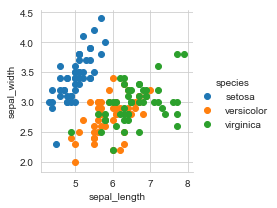

In [9]:
# 2-D Plot
# Using seaborn for visualising this relation
sns.set_style('whitegrid')
sns.FacetGrid(iris, hue='species').map(plt.scatter, 'sepal_length', 'sepal_width').add_legend()
#plt.legend(loc=0, fontsize=5, scatterpoints=3)
plt.show()

**With the above plot we can most certainly classify setosa flower significantly from the virginica and versicolor flowers.**

**Since the dataset contains four features, so it can be said that we have data in 4-D array. It's certain that we can't plot 4-D array data, so to analyze the given features better, Pair plot of seaborn library can be used which makes all possible combinations of the given features and gives plot in pairs. This in turn gives a better intuition about the features.**

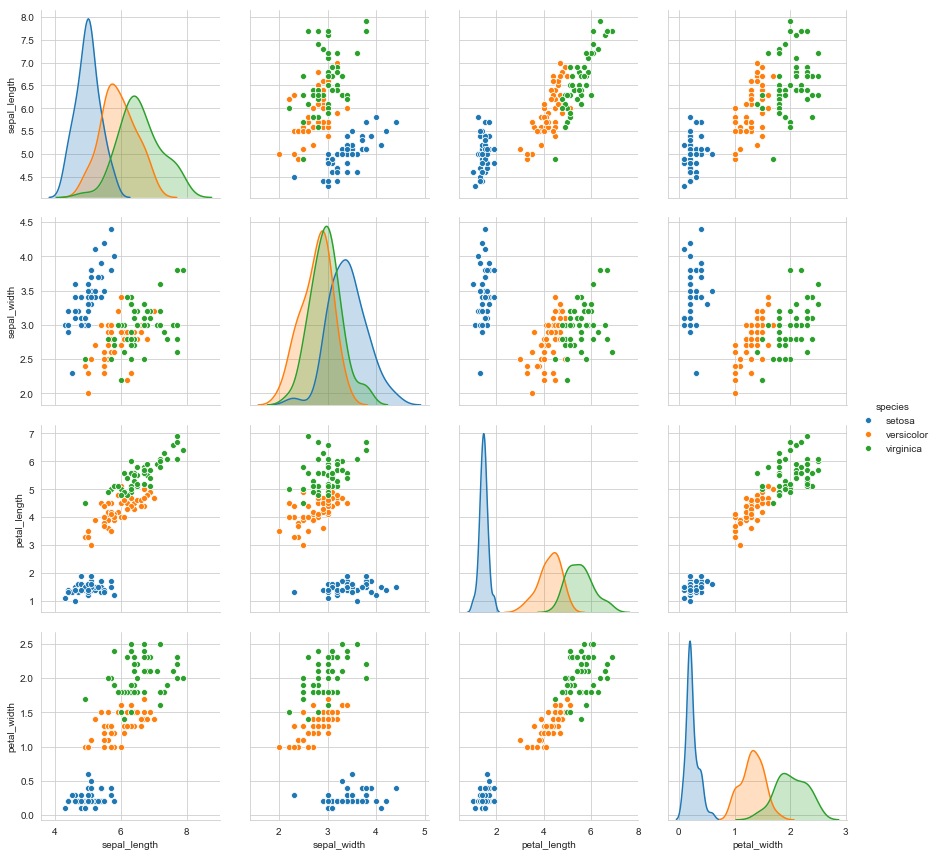

In [10]:
# 3-D Plot using Pair plot
sns.set_style('whitegrid')
sns.pairplot(iris, hue='species', height=3)

**Observation**

1. With the 3-D plot, we get to drill down the data bit more. 
2. Among the numerous plots, the plot which signifies the classification objective most accurately is the plot between "petal_length" and "petal_width".
3. The setosa is separated clearly(linearly separable) and the versicolor and virginica have overlap.
3. This also clarifies that using "petal_length" and "petal_width" features to classify the species of flower will be significant.
4. Upon using "if-else" condition the three species can be classified.

c:\users\shashank\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


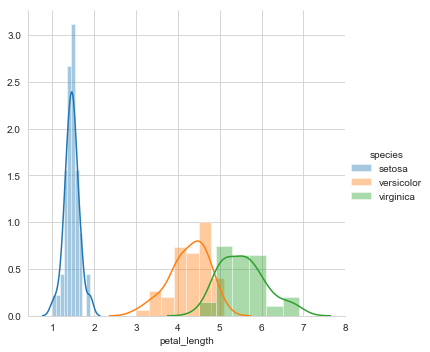

In [11]:
# Analysis of a single feature/variable in the dataset
sns.set_style('whitegrid')
sns.FacetGrid(iris, hue='species', height=5).map(sns.distplot, 'petal_length').add_legend()
plt.show()

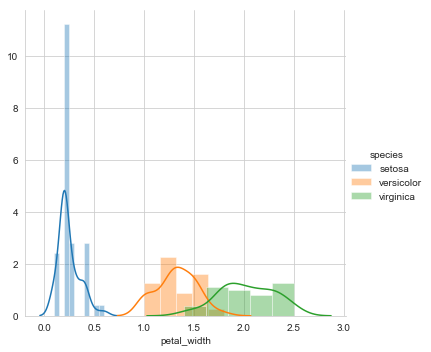

In [12]:
sns.set_style('whitegrid')
sns.FacetGrid(iris, hue='species', height=5).map(sns.distplot, 'petal_width').add_legend()
plt.show()

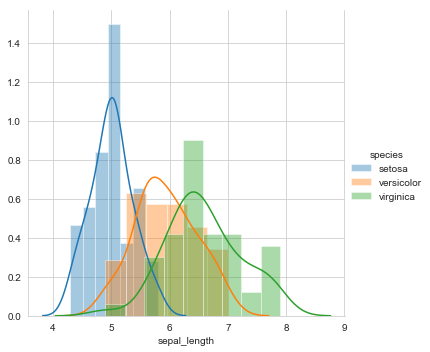

In [13]:
sns.set_style('whitegrid')
sns.FacetGrid(iris, hue='species', height=5).map(sns.distplot, 'sepal_length').add_legend()
plt.show()

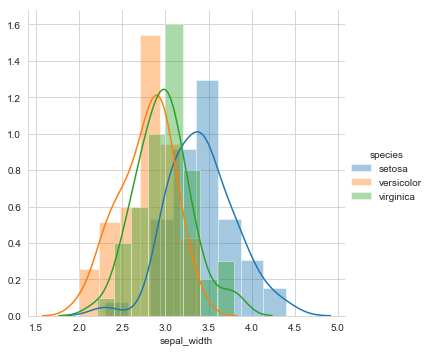

In [14]:
sns.set_style('whitegrid')
sns.FacetGrid(iris, hue='species', height=5).map(sns.distplot, 'sepal_width').add_legend()
plt.show()

**Observation**
1. Among the features in the dataset, it can be seen that for univariate analysis "petal_length" is the most suitable feature to classify the species of flower.
2. In univariate analysis too, setosa is linearly separable and the versicolor and virginica can be classified by setting up certain threshold or using 'if-else' condition.
3. The dark lines i.e. bell like curve are PDF's(Probability Density Function). PDF is the smoothened version of the histograms.

In [15]:
# Apart from PDF, CDF can be used in certain cases of data exploration. With CDF we get to know that what percentage of 
#versicolor flower has petal_length less than 5.

In [16]:
# Frame each species separately
iris_setosa = iris.loc[iris['species'] == 'setosa'];
iris_versicolor = iris.loc[iris['species'] == 'versicolor'];
iris_virginica = iris.loc[iris['species'] == 'virginica'];

**Calculate PDF:**

In [17]:
# The PDF helps in determining the density of data across different range/intervals.
count, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, density =True)
pdf = count/sum(count)
#print(count)
print(pdf)
print(bin_edges)

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


**Calculate CDF:**

[0.02 0.04 0.08 0.22 0.46 0.74 0.88 0.96 0.96 1.  ]


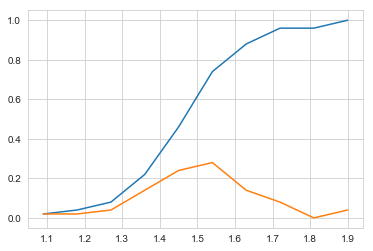

In [18]:
# The CDF comes handy when, we want to know % of points(data points) with certain condition for any specific feature in the dataset.
# Example: If we want to know what percentage of versicolor flower has petal length less than 5.
cdf = np.cumsum(pdf) #Cumulative sum of pdf
print(cdf)
# plot pdf and cdf
plt.plot(bin_edges[1:], cdf)
plt.plot(bin_edges[1:], pdf)
plt.show()

******************** Setosa ********************
PDF:  [0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
Bin Edges:  [1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
CDF:  [0.02 0.04 0.08 0.22 0.46 0.74 0.88 0.96 0.96 1.  ]
******************** Virginica ********************
PDF:  [0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
Bin Edges:  [4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]
CDF:  [0.02 0.12 0.36 0.44 0.62 0.78 0.88 0.92 0.94 1.  ]
******************** Versicolor ********************
PDF:  [0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
Bin Edges:  [3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]
CDF:  [0.02 0.06 0.12 0.16 0.32 0.46 0.58 0.78 0.92 1.  ]


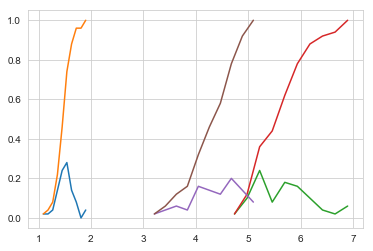

In [19]:
# Calculate the pdf and cdf combinely of all the flowers with petal_length

#For setosa
count, bin_edges = np.histogram(iris_setosa['petal_length'],bins=10,density=True)
pdf = count/sum(count)
cdf = np.cumsum(pdf)
print('*'*20,'Setosa','*'*20)
print('PDF: ',pdf)
print('Bin Edges: ',bin_edges)
print('CDF: ',cdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

#For virginica
count, bin_edges = np.histogram(iris_virginica['petal_length'],bins=10,density=True)
pdf = count/sum(count)
cdf = np.cumsum(pdf)
print('*'*20,'Virginica','*'*20)
print('PDF: ',pdf)
print('Bin Edges: ',bin_edges)
print('CDF: ',cdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

#For versicolor
count, bin_edges = np.histogram(iris_versicolor['petal_length'],bins=10,density=True)
pdf = count/sum(count)
cdf = np.cumsum(pdf)
print('*'*20,'Versicolor','*'*20)
print('PDF: ',pdf)
print('Bin Edges: ',bin_edges)
print('CDF: ',cdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)


plt.show();

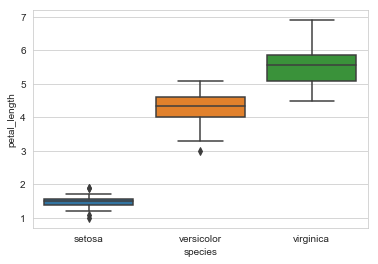

In [20]:
# Box plot
# In this dataset box plot will come handy, when we want to know value of petal length at 25%, 50%, 75% of any flower.
# Basically, the value of petal length at 25% will tell that 25% of certain flower has petal length of the the value obtained.

# Note: For drawing whiskers Seaborn uses the formula of 1.5*IQR.

#sns.boxplot(iris['species'], iris['petal_length'])
sns.boxplot(x='species', y='petal_length', data=iris)
plt.show()

**Observation**
1. It can be said that 25% of versicolor has petal length less than or equal to 4, and 75% has value upto 4.5
2. 75% of virginica flower has petal length upto 5.8
3. Also, 25% of virginica flower is mis-classified as versicolor.
4. Thus, to avoid this large amount of mis-classification, threshold can be set, say petal length of 5, below which it is versicolor and virginica beyond.

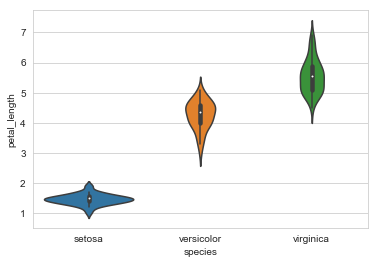

In [21]:
# Violin plot
#The violin plot is the combination of box plot and pdf/histograms.
# Using violin plot we can get more information about the flowers at a single place.
sns.violinplot(x='species', y='petal_length', data=iris, height=9)
plt.show()

**Observation**
1. The middle white portion in each plot is 50% i.e. median value of each flower, and above and below that are 25% and 75% value of petal length of flower.
2. THe bell like curve in each figure surrounding box plot are respective PDF of each flower.
3. From plot, it can be said that the range of value of petal length of Setosa is normally distributed while a bit skewed for Versicolor and Virginica.

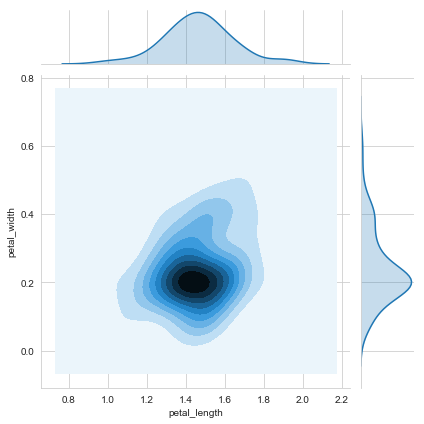

In [24]:
#Multivariate Density plot/ Contour plot
# 1-D Density plot is PDF
# 2-D Density plot is Contour plot
# The coutour plots comes handy when it's needed to analyze the density between two variables within certain region, 
# Basically the change you want to see in the value of a variable with the change in values of other two independent variables. 
# In case of Iris Data, the countour plot suffice the same purpose of bivariate analysis of data. Since, the petal_length and
#petal_width are most important feature, the plot is made against these features to analyze density of data in diff regions.

sns.jointplot(x='petal_length', y='petal_width', data=iris_setosa, kind='kde')
plt.show()

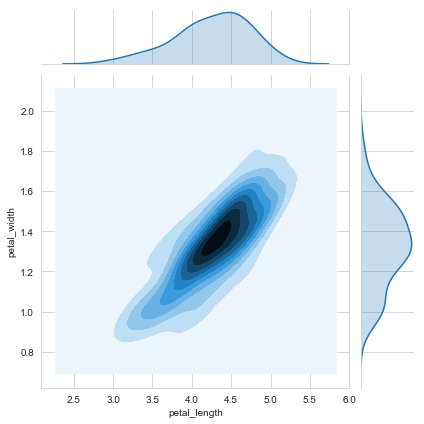

In [25]:
sns.jointplot(x='petal_length', y='petal_width', data=iris_versicolor, kind='kde')
plt.show()

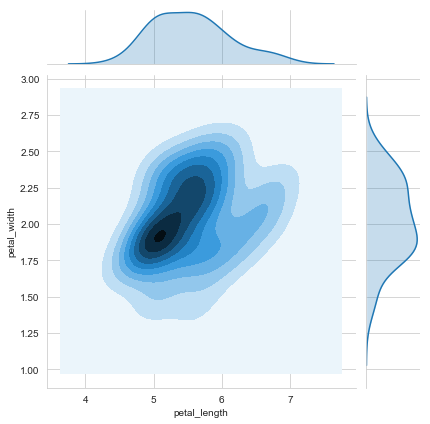

In [26]:
sns.jointplot(x='petal_length', y='petal_width', data=iris_virginica, kind='kde')
plt.show()